In [14]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import seaborn as sns
import matplotlib.pyplot as plt


In [15]:
df = pd.read_csv('~/MITM-Detection/features-file-2.csv')

In [16]:

# Display the first few rows of the DataFrame
print(df.head())

# Extract features and labels
X = df.iloc[:, :-1]  # Features (all columns except the last one)
y = df.iloc[:, -1]   # Labels (last column)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape dữ liệu để phù hợp với đầu vào của Conv1D
X_train = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

           0  6.666666667  0.1  0.2  0.3
0   8.000000    61.666667   24    0    0
1  18.000000    43.333333   54    0    0
2  23.666667    41.333333   71    0    0
3  37.666667    38.333333   91    0    0
4  52.333333    25.000000   95    0    0


In [17]:
model = Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [18]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

Epoch 1/100


118/118 [==============================] - 2s 5ms/step - loss: 1.1256 - accuracy: 0.5613 - val_loss: 0.6639 - val_accuracy: 0.6575
Epoch 2/100
118/118 [==============================] - 0s 3ms/step - loss: 0.6334 - accuracy: 0.6411 - val_loss: 0.5897 - val_accuracy: 0.6596
Epoch 3/100
118/118 [==============================] - 0s 4ms/step - loss: 0.5837 - accuracy: 0.6674 - val_loss: 0.5194 - val_accuracy: 0.7264
Epoch 4/100
118/118 [==============================] - 1s 5ms/step - loss: 0.5000 - accuracy: 0.8085 - val_loss: 0.4445 - val_accuracy: 0.7900
Epoch 5/100
118/118 [==============================] - 1s 6ms/step - loss: 0.3969 - accuracy: 0.9072 - val_loss: 0.3333 - val_accuracy: 0.9480
Epoch 6/100
118/118 [==============================] - 1s 5ms/step - loss: 0.3245 - accuracy: 0.9326 - val_loss: 0.2565 - val_accuracy: 0.9629
Epoch 7/100
118/118 [==============================] - 1s 5ms/step - loss: 0.2612 - accuracy: 0.9525 - val_loss: 0.2213 - val_accuracy: 0.9629
Epoch 8/100

In [19]:
# Tính confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[624   3]
 [ 21 295]]


In [22]:
#Get the evaluation metrics like precision, recall, f1-score
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_binary))


              precision    recall  f1-score   support

           0       0.97      1.00      0.98       627
           1       0.99      0.93      0.96       316

    accuracy                           0.97       943
   macro avg       0.98      0.96      0.97       943
weighted avg       0.97      0.97      0.97       943



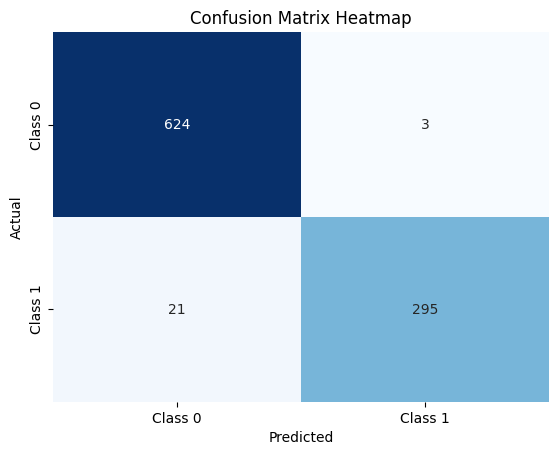

In [21]:
# Hiển thị heatmap cho confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()